In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [2]:
# Load the dataset
diabetes_data = pd.read_csv("diabetes.csv")

In [3]:
# Separate features and target
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# PSO Feature Selection Implementation
class PSOFeatureSelection:
    def __init__(self, n_particles, n_features, X_train, y_train, X_test, y_test, max_iter=100, w=0.9, c1=0.5, c2=0.3):
        self.n_particles = n_particles
        self.n_features = n_features
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.max_iter = max_iter
        self.w = w  # inertia weight
        self.c1 = c1  # cognitive parameter
        self.c2 = c2  # social parameter
        

In [7]:


class PSOFeatureSelection:
    def __init__(self, n_particles, n_features, X_train, y_train, X_test, y_test, max_iter=100, w=0.9, c1=0.5, c2=0.3):
        self.n_particles = n_particles
        self.n_features = n_features
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.max_iter = max_iter
        self.w = w  # inertia weight
        self.c1 = c1  # cognitive parameter
        self.c2 = c2  # social parameter
        
        # Initialize particles as float arrays (not boolean)
        self.particles = np.random.rand(n_particles, n_features)
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        
        # Initialize best positions and scores
        self.pbest_positions = self.particles.copy()
        self.pbest_scores = np.zeros(n_particles)
        self.gbest_position = None
        self.gbest_score = -np.inf
        
        # Evaluate initial particles
        self._evaluate_particles()
    
    def _evaluate_particles(self):
        for i in range(self.n_particles):
            # Convert continuous values to binary feature selection
            selected_features = self.particles[i] > 0.5
            
            # Skip if no features are selected
            if np.sum(selected_features) == 0:
                self.pbest_scores[i] = -np.inf
                continue
                
            # Train and evaluate model with selected features
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(self.X_train[:, selected_features], self.y_train)
            y_pred = model.predict(self.X_test[:, selected_features])
            score = accuracy_score(self.y_test, y_pred)
            
            # Update personal best
            if score > self.pbest_scores[i]:
                self.pbest_scores[i] = score
                self.pbest_positions[i] = self.particles[i].copy()
                
            # Update global best
            if score > self.gbest_score:
                self.gbest_score = score
                self.gbest_position = self.particles[i].copy()
    
    def _update_velocities(self):
        for i in range(self.n_particles):
            r1 = np.random.rand(self.n_features)
            r2 = np.random.rand(self.n_features)
            
            cognitive = self.c1 * r1 * (self.pbest_positions[i] - self.particles[i])
            social = self.c2 * r2 * (self.gbest_position - self.particles[i])
            self.velocities[i] = self.w * self.velocities[i] + cognitive + social
    
    def _update_positions(self):
        # Update positions using velocities
        self.particles = self.particles + self.velocities
        
        # Keep particles within [0,1] range
        self.particles = np.clip(self.particles, 0, 1)
    
    def run(self):
        for iteration in range(self.max_iter):
            self._update_velocities()
            self._update_positions()
            self._evaluate_particles()
            
            print(f"Iteration {iteration+1}/{self.max_iter}, Best Accuracy: {self.gbest_score:.4f}")
        
        # Convert final best position to binary mask
        best_mask = self.gbest_position > 0.5
        return best_mask, self.gbest_score

# Usage example:
n_features = X_train.shape[1]
pso = PSOFeatureSelection(n_particles=20, n_features=n_features, 
                         X_train=X_train, y_train=y_train,
                         X_test=X_test, y_test=y_test,
                         max_iter=50)

selected_features_mask, best_score = pso.run()
selected_features = np.where(selected_features_mask)[0]
print("Selected features:", selected_features)
print("Best accuracy:", best_score)

Iteration 1/50, Best Accuracy: 0.7576
Iteration 2/50, Best Accuracy: 0.7576
Iteration 3/50, Best Accuracy: 0.7576
Iteration 4/50, Best Accuracy: 0.7576
Iteration 5/50, Best Accuracy: 0.7706
Iteration 6/50, Best Accuracy: 0.7706
Iteration 7/50, Best Accuracy: 0.7706
Iteration 8/50, Best Accuracy: 0.7706
Iteration 9/50, Best Accuracy: 0.7706
Iteration 10/50, Best Accuracy: 0.7706
Iteration 11/50, Best Accuracy: 0.7706
Iteration 12/50, Best Accuracy: 0.7706
Iteration 13/50, Best Accuracy: 0.7706
Iteration 14/50, Best Accuracy: 0.7706
Iteration 15/50, Best Accuracy: 0.7706
Iteration 16/50, Best Accuracy: 0.7706
Iteration 17/50, Best Accuracy: 0.7706
Iteration 18/50, Best Accuracy: 0.7706
Iteration 19/50, Best Accuracy: 0.7706
Iteration 20/50, Best Accuracy: 0.7706
Iteration 21/50, Best Accuracy: 0.7706
Iteration 22/50, Best Accuracy: 0.7706
Iteration 23/50, Best Accuracy: 0.7706
Iteration 24/50, Best Accuracy: 0.7706
Iteration 25/50, Best Accuracy: 0.7706
Iteration 26/50, Best Accuracy: 0.

In [8]:
# After running PSO and getting the selected features
selected_features_mask, best_score = pso.run()

# Get the feature names (assuming your original dataframe is called 'diabetes_data')
feature_names = diabetes_data.columns[:-1]  # Exclude the 'Outcome' column

# Print which features were selected
print("\nFeature Selection Results:")
print("="*40)
for i, name in enumerate(feature_names):
    selected = "SELECTED" if selected_features_mask[i] else "not selected"
    print(f"{name:25s}: {selected}")

# Print the indices of selected features
selected_indices = np.where(selected_features_mask)[0]
print("\nSelected feature indices:", selected_indices)
print("Number of selected features:", len(selected_indices))
print("Best accuracy achieved:", f"{best_score:.4f}")

# You can also get the names of just the selected features
selected_feature_names = feature_names[selected_indices]
print("\nSelected feature names:")
print(selected_feature_names.tolist())

Iteration 1/50, Best Accuracy: 0.7706
Iteration 2/50, Best Accuracy: 0.7706
Iteration 3/50, Best Accuracy: 0.7706
Iteration 4/50, Best Accuracy: 0.7706
Iteration 5/50, Best Accuracy: 0.7706
Iteration 6/50, Best Accuracy: 0.7706
Iteration 7/50, Best Accuracy: 0.7706
Iteration 8/50, Best Accuracy: 0.7706
Iteration 9/50, Best Accuracy: 0.7706
Iteration 10/50, Best Accuracy: 0.7706
Iteration 11/50, Best Accuracy: 0.7706
Iteration 12/50, Best Accuracy: 0.7706
Iteration 13/50, Best Accuracy: 0.7706
Iteration 14/50, Best Accuracy: 0.7706
Iteration 15/50, Best Accuracy: 0.7706
Iteration 16/50, Best Accuracy: 0.7706
Iteration 17/50, Best Accuracy: 0.7706
Iteration 18/50, Best Accuracy: 0.7706
Iteration 19/50, Best Accuracy: 0.7706
Iteration 20/50, Best Accuracy: 0.7706
Iteration 21/50, Best Accuracy: 0.7706
Iteration 22/50, Best Accuracy: 0.7706
Iteration 23/50, Best Accuracy: 0.7706
Iteration 24/50, Best Accuracy: 0.7706
Iteration 25/50, Best Accuracy: 0.7706
Iteration 26/50, Best Accuracy: 0.

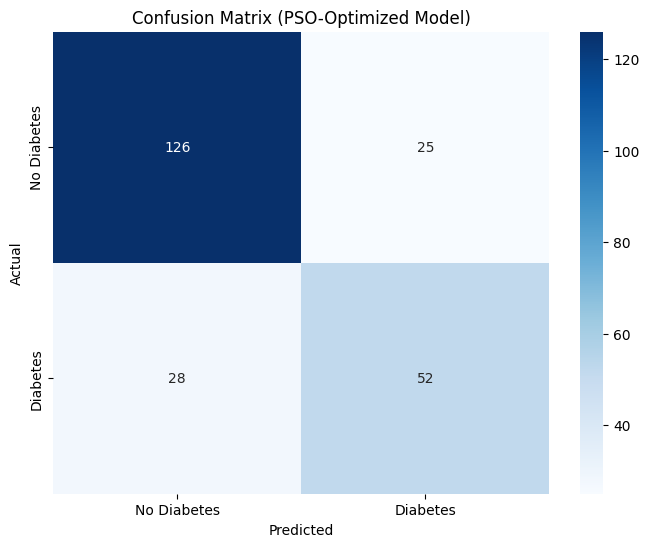

Classification Report:\n               precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.68      0.65      0.66        80

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train final model with selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train[:, selected_features_mask], y_train)

# Predictions
y_pred = model.predict(X_test[:, selected_features_mask])

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (PSO-Optimized Model)')
plt.show()

# Print classification report
print("Classification Report:\\n", classification_report(y_test, y_pred))

In [10]:
# Print specific diabetes prediction message
if y_pred[0] == 1:
    print("\nThe persondoes not diabetes.")
else:
    print("\nThe person has diabetes.")


The person has diabetes.
